In [2]:
#   The purpose of fist code:
#   Get the simulation data;
#  
#   In this research, the data is stored in TXT file.
#   And the incident muon is uniform and collimated accelerator muon, the incident direction is the z direction,
#   scintillators is the XOY plane and the object is at the origin point.

#   This is the code of format conversion for later PoCA algorithm
#==========================================================================

import ROOT as r
import numpy as np

#Parameters of Scintillators
Lx=100 #cm;  X length of Scintillator
Ly=100 #cm;  Y length of Scintillator
Xbin=1 #cm;  X Width  of one Scintillator
Ybin=1 #cm;  Y Width  of one Scintillator
Z0 = [-125,-25,25,125]  #cm;  Z position of four track detectors


########## Data taking
Data=[]

outline=0   # Limit the number of muon events used for later imaging

# Path of simulation data on SJTU/INPAC server cluster
path = "../../data/"
for line in open('{}/TDLI_Imaging-Tracks.txt'.format(path),'r'):      #Read line by line
    a = line.split()    # Read string and split with "      "
    X = []              # Store X position of four track detectors
    Y = []

    p1=[]               # Store center position of hit pixel in Track detector '1'
    p2=[]               # ...... in Track detector '2'
    p3=[]               # ...... in Track detector '3'
    p4=[]               # ...... in Track detector '4'
    data=[]             # Store [p1,p2,p3,p4]
    
    if len(a)!=20: continue # The line with 20(5*4) strings is required
    else:
        for i in range(20):
            if i % 5 == 0: X.append(float(a[i])/10)     #1/5 is x 
            if i % 5 == 1: Y.append(float(a[i])/10)     #2/5 is Y
        
        px = float(a[17])
        py = float(a[18])
        pz = float(a[19])
        P = int(np.sqrt(px*px+py*py+pz*pz))     # P, the momentum value in Track detector '4'
        
        X_new=[]    # Store center position of hit pixel
        Y_new=[]

        for j in range(len(X)):     # Convert hit position to center position of hit pixel
            x_num = int((X[j]+Lx/2)/Xbin+1)         # X code of scintillators
            X_new.append((x_num-0.5)*Xbin-Lx/2)     # The center position of correspond X code
            y_num = int((Y[j]+Ly/2)/Ybin+1)         # Y code of scintillators
            Y_new.append((y_num-0.5)*Ybin-Ly/2)     # The center position of correspond Y code

        # Fill the position
        p1.append(X_new[0])
        p1.append(Y_new[0])
        p1.append(Z0[0])
        
        p2.append(X_new[1])
        p2.append(Y_new[1])
        p2.append(Z0[1])
        
        p3.append(X_new[2])
        p3.append(Y_new[2])
        p3.append(Z0[2])
        
        p4.append(X_new[3])
        p4.append(Y_new[3])
        p4.append(Z0[3])
        
        data.append(p1)
        data.append(p2)
        data.append(p3)
        data.append(p4)
        data.append(P)

    Data.append(data)      # Store the coordinates of each track as a set in a new list. It's for the analysis later

    outline+=1
    if(outline>1000000):break     # Use ... events for imaging
print(len(Data))                # Make sure the number
print(Data[:10])                #See the contents of the list 'Data'


999572
[[[-9.5, -4.5, -125], [-9.5, -4.5, -25], [-9.5, -4.5, 25], [-9.5, -3.5, 125], 1087], [[17.5, -2.5, -125], [17.5, -2.5, -25], [16.5, -2.5, 25], [16.5, -3.5, 125], 1088], [[-8.5, -4.5, -125], [-8.5, -3.5, -25], [-8.5, -3.5, 25], [-8.5, -3.5, 125], 1090], [[0.5, -2.5, -125], [0.5, -2.5, -25], [0.5, -2.5, 25], [0.5, -2.5, 125], 1088], [[3.5, -4.5, -125], [4.5, -4.5, -25], [4.5, -4.5, 25], [4.5, -4.5, 125], 1087], [[-0.5, -3.5, -125], [-0.5, -4.5, -25], [-0.5, -4.5, 25], [-1.5, -4.5, 125], 1087], [[9.5, -0.5, -125], [9.5, -0.5, -25], [9.5, -1.5, 25], [9.5, -1.5, 125], 1088], [[10.5, 0.5, -125], [10.5, 0.5, -25], [10.5, 0.5, 25], [9.5, 0.5, 125], 1087], [[-12.5, -2.5, -125], [-12.5, -2.5, -25], [-13.5, -2.5, 25], [-13.5, -2.5, 125], 1087], [[3.5, 0.5, -125], [2.5, 0.5, -25], [2.5, 0.5, 25], [2.5, 1.5, 125], 1087]]


PoCAs:
[[27, 27, 1], [93, 38, 1], [29, 33, 1], [52, 38, 1], [62, 28, 1], [49, 27, 1], [74, 45, 1], [77, 53, 1], [18, 38, 1], [56, 52, 1]]
       
PoINTs:
[[-9.399999999999999, -4.699999999999999, 0.0], [17.0, -2.5, 0.0], [-8.6, -3.5, 0.0], [0.6000000000000014, -2.5, 0.0], [4.600000000000001, -4.5, 0.0], [-0.5999999999999979, -4.699999999999999, 0.0], [9.400000000000002, -1.0999999999999996, 0.0], [10.600000000000001, 0.5, 0.0], [-13.0, -2.5, 0.0], [2.200000000000003, 0.3000000000000007, 0.0]]
       
SD:
[2.0539786575885866, 0.8225963312884127, 0.9420317564130412, 0.8230007432625557, 0.7559464073191833, 2.2214143456701456, 0.8595165075950536, 0.8046160521608179, 0.7465375912686865, 2.722400210360568]
       


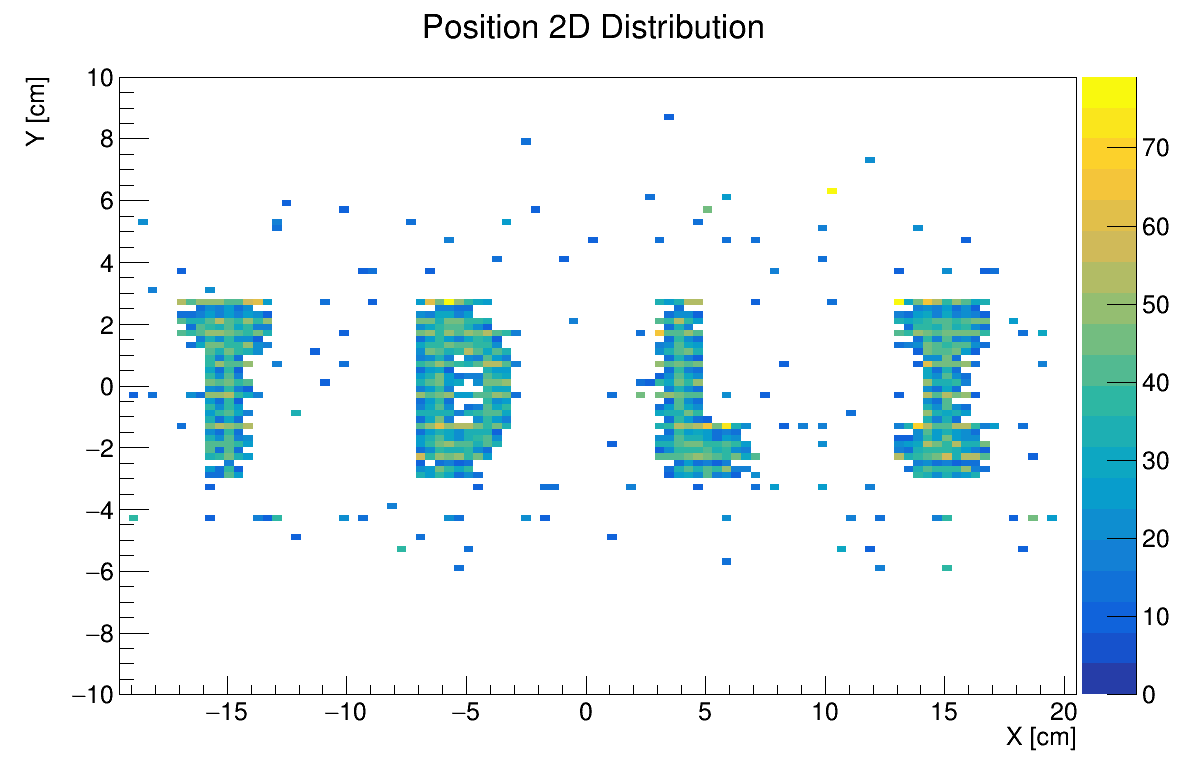

In [3]:
#   Image Reconstruction using PoCA

#   This is the script for reconstrucing target material image using PoCA algorithm
#==========================================================================

#'Functions' used in this current "Imaging" script
#1. POCA.py              # To find the PoCA points.
#2. IOAngle.py           # To compute in/out scattering angles
#3. Voxel.py             # To achieve voxelization and get angle width in each voxel
#==========================================================================

import sys
sys.path.append(r'../PoCA_Algorithm/')
#When importing modules in Python, they are searched in the order they appear in sys.path.
#sys.path is a list that stores many paths as strings.
#To use a function from an A.py file, you first need to put the path of the file in sys.path.
# https://blog.csdn.net/gsgbgxp/article/details/117042635


# Self-defined functions
import POCA
import IOAngle
import Voxel

# packages in python and cern-root
import ROOT as r
import numpy as np
import math


#Parameters of Object
BIN_X=100            # Divide Object into ... equal parts in X direction
BIN_Y=100            # Divide Object into ... equal parts in Y direction
BIN_Z=1              # Divide Object into ... equal parts in Z direction

X_min = -20         # Region of Interest_X_minimum [cm]
X_max =  20         # Region of Interest_X_minimum [cm]

Y_min = -10         # Region of Interest_Y_minimum [cm]
Y_max =  10         # Region of Interest_Y_minimum [cm]

Z_min = -2.5         # Region of Interest_Z_minimum [cm]
Z_max =  2.5         # Region of Interest_Z_minimum [cm]

ObjectGeo = [[BIN_X,BIN_Y,BIN_Z],[[X_min,X_max],[Y_min,Y_max],[Z_min,Z_max]]]


############ Get POCAs, Angle, and Scattering density
POCAs = []      # Get the Scatter point voxel code using muon tracks
POINTs = []     # Get the Scatter point coordinate using muon tracks
AngleX = []     # Record the scattering angle in x direction
AngleY = []     # Record the scattering angle in y direction
Momentum = []   # Record muon momentum after object

for Points in Data:     # Get the one set of muon tracks from list'Data'
    p1=Points[0]        # Point position on the track detector '1'
    p2=Points[1]        # Point position on the track detector '2'
    p3=Points[2]
    p4=Points[3]
    P=Points[4]

    pocas,points,flag_continue = POCA.Point(p1,p2,p3,p4,ObjectGeo)              # Call Function "PoCA"
    if flag_continue: continue
    
    POCAs.append(pocas)
    POINTs.append(points)

    angleX,angleY = IOAngle.InOutAngle(p1,p2,p3,p4)     # Call Function "IOAngle"
    AngleX.append(angleX)
    AngleY.append(angleY)

    Momentum.append(P)

#Currently, the scattering points and scattering angle of all muon tracks have been obtained

#Nextly, the events and angle width in each voxel will be calculated using Function 'Voxel'
#==========================================================================

# PoCAS: Record non-repetitive scattering point 
# PoINTs: Record non-repetitive scattering point
# XAngle,YAngle: The RMS of angle distribution in the x,y direction 
# Events: Record events number in each point
# SD: Scattering density using XAngle,YAngle information

# Path_length: The muon path in the object
path_length = Z_max-Z_min

PoCAS,PoINTs,XAngle,YAngle,Events_num,SD=Voxel.Calculate(POCAs,POINTs,AngleX,AngleY,Momentum,path_length)

print("PoCAs:")
print(PoCAS[:10])
print("       ")

print("PoINTs:")
print(PoINTs[:10])
print("       ")

print("SD:")
print(SD[:10])
print("       ")


#======================= Plot imaging results =======================

r.gStyle.SetPalette(57)     #"Spring" style
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)

hist = r.TH2D("hist","Position 2D Distribution;X [cm];Y [cm]",BIN_X,-19.5,20.5,BIN_Y,-10,10)

c = r.TCanvas("c", "c", 1200, 800)

for i in range(len(PoINTs)):
    point = PoINTs[i]

    z = point[2]
    if z !=0: continue      #Only show certain layer
    
    xbin = hist.GetXaxis().FindBin(point[0])
    ybin = hist.GetYaxis().FindBin(point[1])
    v = SD[i]   # The scattering density in each voxel

    if v<10 or v>100: continue  # Set the range to reduce noise points

    hist.SetBinContent(xbin,ybin,v)

hist.Draw("colz")

c.Draw()


# Later codes are different diagrams to show imaging results

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


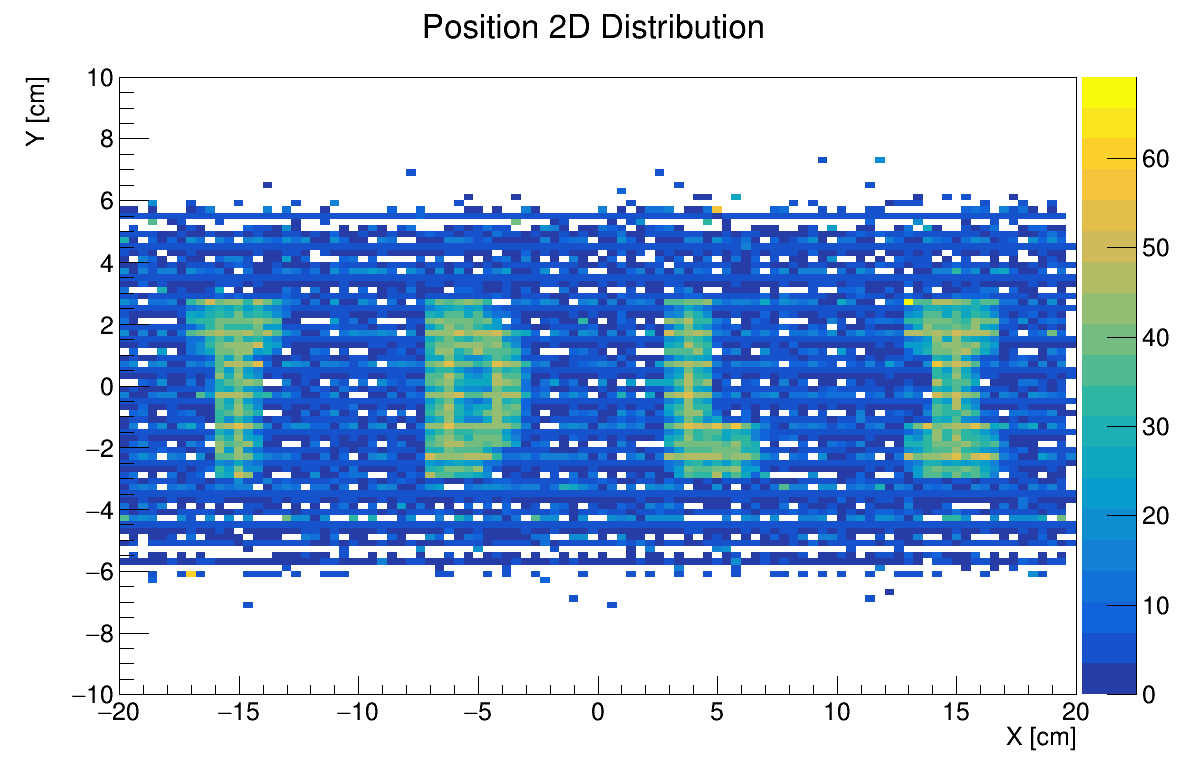

In [9]:
# Plot angle width in the y direction
#======================= Imaging results =======================

r.gStyle.SetPalette(57)
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)

hist = r.TH2D("hist","Position 2D Distribution;X [cm];Y [cm]",100,-20,20,100,-10,10)

c = r.TCanvas("c", "c", 1200, 800)

for i in range(len(PoINTs)):
    point = PoINTs[i]

    z = point[2]
    if z !=0: continue      #Only show certain layer
    
    xbin = hist.GetXaxis().FindBin(point[0])
    ybin = hist.GetYaxis().FindBin(point[1])
    v = YAngle[i]

    hist.SetBinContent(xbin,ybin,v)

hist.Draw("colz")

c.Draw()